# Projet 4 

## Description 

Étude de la mal nutrition dans le monde à partir de 4 fichiers csv contenant des données de 2013 à 2017.

La premiere partie de cette étude est concacré à l'année 2017


In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import plotly.express as px

In [202]:
aide_alimentaire = pd.read_csv('CSV/aide_alimentaire.csv')
sous_nutrition = pd.read_csv('CSV/sous_nutrition.csv')
dispo_alimentaire = pd.read_csv('CSV/dispo_alimentaire.csv')
population = pd.read_csv('CSV/population.csv')

In [203]:
#display(aide_alimentaire.head())
display(sous_nutrition.head())
#display(dispo_alimentaire.head())
display(population.head())



,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


Je choisis de prend 0.025 pour les population <0.1

In [204]:
sous_nutrition.loc[sous_nutrition['Valeur'] == '<0.1', 'Valeur'] = '0.025'
sous_nutrition['Valeur'] = sous_nutrition["Valeur"].astype(float)
sous_nutrition["Valeur"].fillna(value=0, inplace=True)
sous_nutrition_2017 = sous_nutrition.loc[(sous_nutrition['Année']=='2016-2018'),:]
total_sous_nutrition_2017 = sous_nutrition_2017['Valeur'].sum()
population_2017 = round(population.loc[population['Année']== 2017 ,'Valeur'].sum(),) * 1000
proportion_malnutrition_2017 = round((total_sous_nutrition_2017 * 1000000) / population_2017,3)


print("En 2017, la poopulation total etait de",population_2017,"et la quantitée de personne sous nourris etait de",total_sous_nutrition_2017,"ce qui fait qu'en 2017",proportion_malnutrition_2017*100,"% de la population était mal nourris")

En 2017, la poopulation total etait de 7548134000 et la quantitée de personne sous nourris etait de 536.2 ce qui fait qu'en 2017 7.1 % de la population était mal nourris


Il faut en moyenne 2500Kcal/personne/jour 

In [205]:
dispoAlimMondial = pd.merge(dispo_alimentaire[["Zone","Disponibilité alimentaire (Kcal/personne/jour)","Origine"]],population.loc[population["Année"]==2017,["Zone","Valeur"]],how='left',on='Zone')
dispoAlimMondial["dispo_Kcal"] = dispoAlimMondial["Disponibilité alimentaire (Kcal/personne/jour)"] * dispoAlimMondial["Valeur"] * 365
totalKcalHumain = round((dispoAlimMondial["dispo_Kcal"].sum()*1000)/(2500*365),)
print(totalKcalHumain,"humains peuvent etre nourris")
propTotalKcalHumain = round((totalKcalHumain*100)/ (population_2017),1)
print("soit une proportion de ",propTotalKcalHumain,"%")


8367593851 humains peuvent etre nourris
soit une proportion de  110.9 %


In [206]:
dispoAlimMondialVege = dispoAlimMondial.loc[dispoAlimMondial["Origine"]=="vegetale"]
totalKcalHumainVege = round((dispoAlimMondialVege["dispo_Kcal"].sum()*1000)/(2500*365),)
print(totalKcalHumainVege,"humains peuvent etre nourris avec de la nourriture vegetal")
propTotalKcalHumainVege = round((totalKcalHumainVege*100)/ (population_2017),1)
print("soit une proportion de ",propTotalKcalHumainVege,"%")

6904305685 humains peuvent etre nourris avec de la nourriture vegetal
soit une proportion de  91.5 %


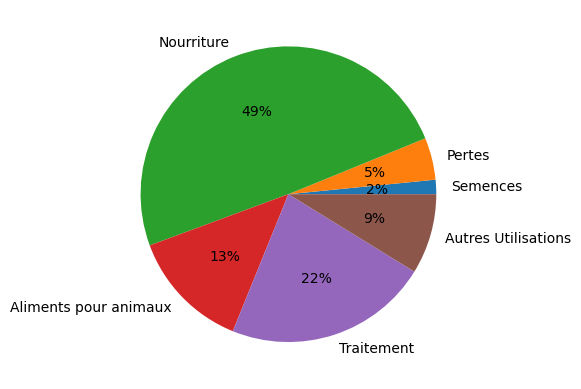

In [207]:
liste = ['Semences','Pertes','Nourriture','Aliments pour animaux',"Traitement","Autres Utilisations"]
liste2 = []
for variable in liste:
    a = dispo_alimentaire[variable].sum()
    liste2.append(a)
df1 = pd.DataFrame(liste2, index=liste, columns=["Totaux1"])
graphPie1 = plt.pie(x=df1["Totaux1"], labels=liste, autopct='%.0f%%')



Proportion de personnes sous alimenté la plus forte

/var/folders/9z/twqnyxm936n71h0b6v7yr8vh0000gn/T/ipykernel_99942/791134066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sous_nutrition_2017.rename(columns={'Valeur': 'Population sous alimenté'}, inplace=True)
/var/folders/9z/twqnyxm936n71h0b6v7yr8vh0000gn/T/ipykernel_99942/791134066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Population2017.rename(columns={'Valeur': 'Population'},inplace=True)


<AxesSubplot:xlabel='Proportion', ylabel='Zone'>

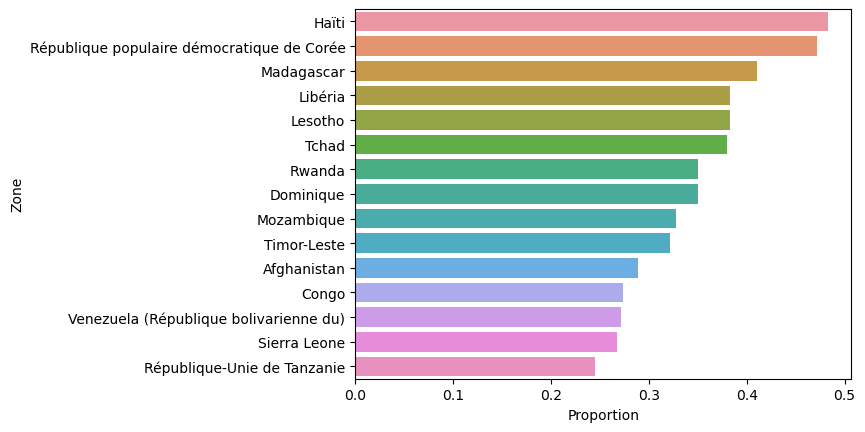

In [224]:
sous_nutrition_2017.rename(columns={'Valeur': 'Population sous alimenté'}, inplace=True)
Population2017 = population.loc[population['Année']==2017]
Population2017.rename(columns={'Valeur': 'Population'},inplace=True)
Population2017.head()
Propotion_sous_alimentation = pd.merge(sous_nutrition_2017[['Zone','Population sous alimenté']],Population2017[["Zone","Population"]], on='Zone')
Propotion_sous_alimentation["Proportion"] = (Propotion_sous_alimentation["Population sous alimenté"]*1000000)/(Propotion_sous_alimentation["Population"]*1000)
Propotion_sous_alimentation.sort_values('Proportion',ascending=False).head(10)

sns.barplot(x="Proportion",y="Zone",data=Propotion_sous_alimentation.sort_values('Proportion',ascending=False).head(15))

Beneficiaire d'aide alimentaire

In [209]:

aide = aide_alimentaire[["Pays bénéficiaire", "Valeur"]].groupby(["Pays bénéficiaire"]).sum()
aide.sort_values("Valeur", ascending=False).head()



,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784


Disponibilité/habitant 

In [210]:
dispoAlimentaire2013 = dispo_alimentaire.groupby(["Zone"]).sum("Disponibilité alimentaire (Kcal/personne/jour)")
dispoAlimentaire2013 = dispoAlimentaire2013[["Disponibilité alimentaire (Kcal/personne/jour)"]]
dispoAlimentaire2013 = dispoAlimentaire2013.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=False)
popu2013 = population.loc[population["Année"]==2013,["Zone","Valeur"]]
dispHabitant = pd.merge(dispoAlimentaire2013, popu2013, on='Zone', how='left')
dispHabitant.rename(columns={'Valeur' : "Population (en millier d'habitants)"})

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Population (en millier d'habitants)
0,Autriche,3770.0,8556.189
1,Belgique,3737.0,11154.009
2,Turquie,3708.0,75925.462
3,États-Unis d'Amérique,3682.0,316400.538
4,Israël,3610.0,7734.841
...,...,...,...
169,Haïti,2089.0,10400.675
170,Afghanistan,2087.0,32269.589
171,Madagascar,2056.0,22961.255
172,Zambie,1924.0,14926.544


Repartiton des cereales

In [211]:
FaoCereal = pd.read_csv("CSV/FaoCereal.csv")
ListeCereal = FaoCereal.iloc[:,7]
ListeCereal = ListeCereal.unique()
ListeCereal = ListeCereal.tolist()
ListeCerealnew = []
for mot in ListeCereal :
    if mot[len(mot)-11:] == "et produits":
        ListeCerealnew.append(mot[:len(mot)-12])
    else :
        ListeCerealnew.append(mot)
ListeCerealnew.remove("Riz")
ListeCerealnew.append("Riz (Eq Blanchi)")

dispo_cereal = dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(ListeCerealnew), ('Produit','Aliments pour animaux','Nourriture',"Disponibilité intérieure")]
dispo_cereal.fillna(value=0, inplace=True)
dispo_cereal = (dispo_cereal.groupby('Produit').sum()[['Aliments pour animaux','Nourriture',"Disponibilité intérieure"]])
dispo_cereal.loc["Total"]=dispo_cereal.sum()

proportion_nourriture = (dispo_cereal["Nourriture"].sum()*100)/(dispo_cereal["Disponibilité intérieure"].sum())
proportion_aliment = (dispo_cereal["Aliments pour animaux"].sum()*100)/(dispo_cereal["Disponibilité intérieure"].sum())
print("la proportion de cereales utilisé pour l'alimentation humaine est de", round(proportion_nourriture,1),'%')
print("la proportion de cereales utilisé pour l'alimentation des animaux est de", round(proportion_aliment,1),"%")

la proportion de cereales utilisé pour l'alimentation humaine est de 42.8 %
la proportion de cereales utilisé pour l'alimentation des animaux est de 36.3 %


Manioc